# Dir Structure
```
<your-repo>
|_ dataset
    |_ dataset.yaml
|_ yolov5*

```

In [4]:
# check if cuda is used
import torch
import os
from os import path

torch.cuda.is_available()

C:\Users\aditi\miniconda3\envs\yolo\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [5]:
print(torch.version.cuda)

11.3


In [ ]:
!python -m torch.utils.collect_env

In [6]:
# create dataset.yaml file
if not path.exists('datasets'):
    os.mkdir('datasets')

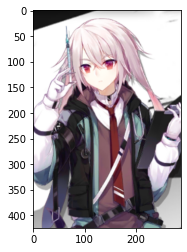

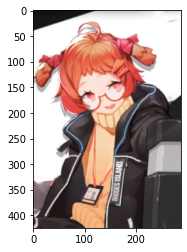

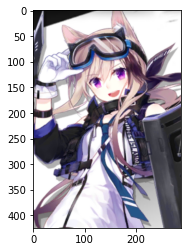

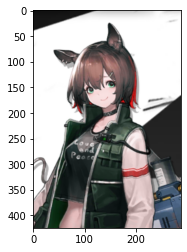

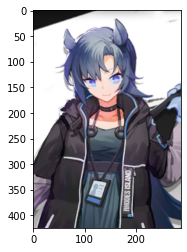

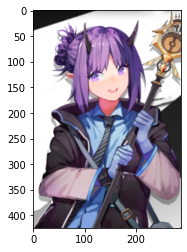

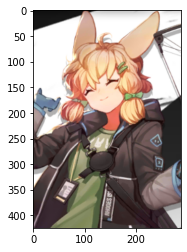

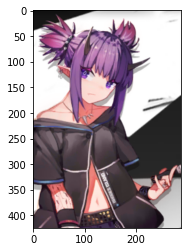

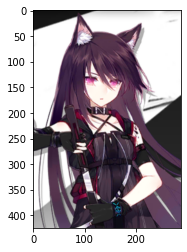

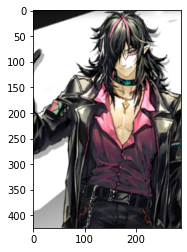

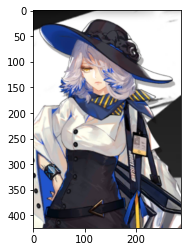

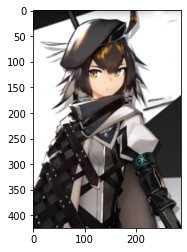

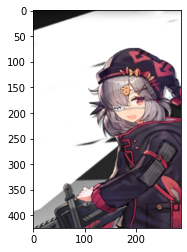

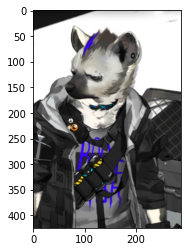

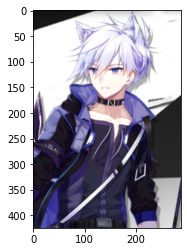

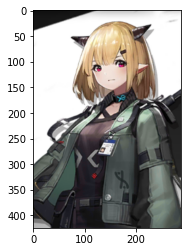

In [29]:
from PIL import Image
import matplotlib.pyplot as plt

# preprocess raw images
def load_image(path):
    size = (1280, 720)
    img = Image.open(path).convert('RGB')
    return img.resize(size)

# crop image for standard 1280x720
def crop_face(img):
    size = img.size
    center = img.size[0]*0.5
    w = size[1]*0.2
    
    left = center-w
    right = center+w
    top = 75
    bottom = 500
    
    img = img.crop((left,top,right,bottom))
    
    return img

def preprocess():
    DIR = './datasets/training/raw'
    SAVE = './datasets/training/images'
    for file in os.listdir(DIR):
        img = load_image(path.join(DIR, file))
        img = crop_face(img)
        
        plt.figure()
        plt.imshow(img)
        
        img.save(f"{SAVE}/{file.split('.')[0]}_body.jpg")

preprocess()

In [ ]:
python yolov5/train.py --img 640 --batch 2 --epochs 1 --data datasets/training/ak.yaml --weights yolov5/yolov5s.pt --hyp hyp.custom.yaml
python yolov5/train.py --img 640 --batch 2 --epochs 300 --data datasets/training/ak.yaml --weights yolov5/yolov5s.pt --hyp hyp.custom.yaml --rect

In [3]:
!python yolov5/detect.py --weights yolov5/runs/train/exp5/weights/best.pt --img 640 --conf 0.4 --source datasets/inference

detect: weights=['yolov5/runs/train/exp5/weights/best.pt'], source=datasets/inference, data=yolov5\data\coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-280-g27d831b Python-3.9.12 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 213 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
image 1/6 D:\Repository\tracking-vision-yolo\datasets\inference\11629306773920_left.jpg: 640x640 Done. (0.011s)
image 2/6 D:\Repository\tracking-vision-yolo\datasets\inference\11629306773920_right.jpg: 640x640 Done. (0.009s)
image 3/6 D:\Repository\tracking-vision-yolo\datasets\inference\1652318725751_right.jpg: 64